In [1]:
!python --version

Python 3.10.12


In [2]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from joblib import dump, load

In [3]:
import os
import numpy as np
import librosa
from tqdm import tqdm

# Function to extract MFCC features from audio
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)  # Use native sampling rate
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs, axis=1)


# Initialize lists to hold data and labels
data = []
labels = []



In [18]:


# Function to extract features from audio files
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs, axis=1)

# Data preparation
data_path = "dataset_audios"
speakers = ["healthy","parkinson"]
data = []
labels = []



from tqdm import tqdm

for speaker in tqdm(speakers, desc="Processing speakers"):
    speaker_path = os.path.join(data_path, speaker)

    for filename in tqdm(os.listdir(speaker_path), desc=f"Processing {speaker}"):
        if filename.endswith(".wav"):
            file_path = os.path.join(speaker_path, filename)
            features = extract_features(file_path)
            data.append(features)
            labels.append(speaker)



Processing speakers: 100%|███████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.19s/it]


In [19]:
# Convert lists to numpy arrays
X = np.array(data)
y = np.array(labels)



In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train a machine learning model (Random Forest as an example)




✅ Random Forest Accuracy: 93.88%

Classification Report:
              precision    recall  f1-score   support

     healthy       1.00      0.88      0.94        26
   parkinson       0.88      1.00      0.94        23

    accuracy                           0.94        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.95      0.94      0.94        49



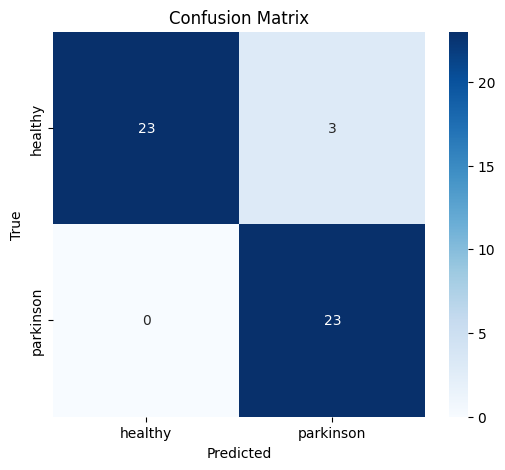


💾 Model saved successfully as 'audio_rf_model.pkl'


In [21]:
import numpy as np
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Train the Random Forest model
# -------------------------------
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# -------------------------------
# 2️⃣ Make predictions
# -------------------------------
y_pred = rf_model.predict(X_test)

# -------------------------------
# 3️⃣ Evaluate the model
# -------------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Random Forest Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# -------------------------------
# 4️⃣ Save the trained model
# -------------------------------
with open("audio_rf_model.pkl", "wb") as f:
    pickle.dump({
        "model": rf_model,
        "labels": np.unique(y)
    }, f)

print("\n💾 Model saved successfully as 'audio_rf_model.pkl'")


In [ ]:
import pickle
import numpy as np
import librosa

# ---------- 1️⃣ Load the saved model ----------
with open("audio_rf_model.pkl", "rb") as f:
    saved_data = pickle.load(f)

model = saved_data["model"]
labels = saved_data["labels"]

print("✅ Model loaded successfully!")

# ---------- 2️⃣ Define the same feature extraction function ----------
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs, axis=1)

# ---------- 3️⃣ Load and preprocess the new .mp3 file ----------
test_file = "dataset/A/A 19 - Copy (3).mp3"   
features = extract_features(test_file).reshape(1, -1)

# ---------- 4️⃣ Make prediction ----------
prediction = model.predict(features)[0]

print(f"\n🎤 Predicted Speaker: {prediction}")


✅ Model loaded successfully!

🎤 Predicted Speaker: parkinson



✅ Decision Tree Accuracy: 93.88%

Classification Report:
              precision    recall  f1-score   support

     healthy       1.00      0.88      0.94        26
   parkinson       0.88      1.00      0.94        23

    accuracy                           0.94        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.95      0.94      0.94        49



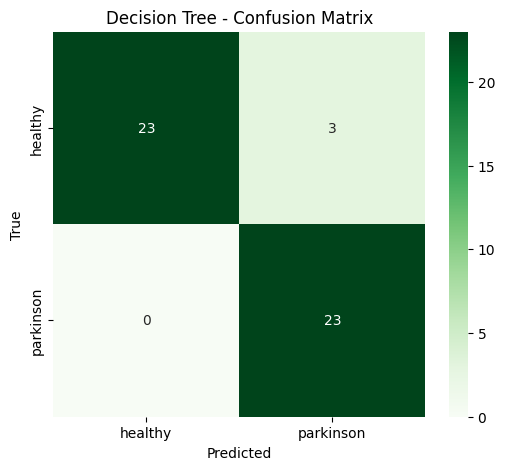


💾 Model saved successfully as 'audio_dt_model.pkl'


In [23]:
import numpy as np
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Train the Decision Tree model
# -------------------------------
dt_model = DecisionTreeClassifier(
    criterion='entropy',   # or 'gini'
    max_depth=None,        # you can set a number (e.g., 10) to avoid overfitting
    random_state=42
)
dt_model.fit(X_train, y_train)

# -------------------------------
# 2️⃣ Make predictions
# -------------------------------
y_pred = dt_model.predict(X_test)

# -------------------------------
# 3️⃣ Evaluate the model
# -------------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Decision Tree Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# -------------------------------
# 4️⃣ Save the trained model
# -------------------------------
with open("audio_dt_model.pkl", "wb") as f:
    pickle.dump({
        "model": dt_model,
        "labels": np.unique(y)
    }, f)

print("\n💾 Model saved successfully as 'audio_dt_model.pkl'")



✅ SVM Model Accuracy: 73.47%

Classification Report:
              precision    recall  f1-score   support

     healthy       0.71      0.85      0.77        26
   parkinson       0.78      0.61      0.68        23

    accuracy                           0.73        49
   macro avg       0.74      0.73      0.73        49
weighted avg       0.74      0.73      0.73        49



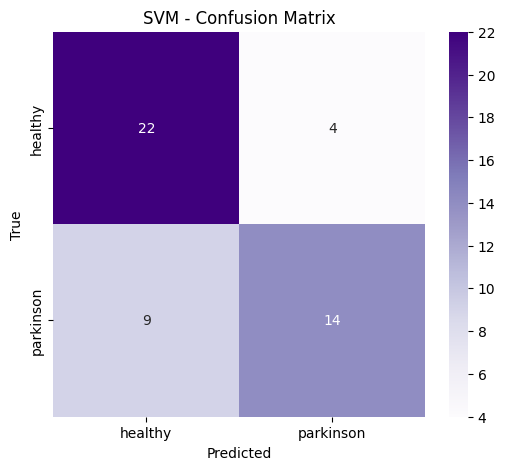


💾 Model saved successfully as 'audio_svc_model.pkl'


In [24]:
import numpy as np
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Train the SVM (SVC) model
# -------------------------------
svc_model = SVC(
    kernel='rbf',        # Try 'linear', 'poly', or 'rbf'
    C=10,                # Regularization parameter
    gamma='scale',       # Kernel coefficient
    probability=True,    # Enables predict_proba()
    random_state=42
)
svc_model.fit(X_train, y_train)

# -------------------------------
# 2️⃣ Make predictions
# -------------------------------
y_pred = svc_model.predict(X_test)

# -------------------------------
# 3️⃣ Evaluate the model
# -------------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ SVM Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# -------------------------------
# 4️⃣ Save the trained model
# -------------------------------
with open("audio_svc_model.pkl", "wb") as f:
    pickle.dump({
        "model": svc_model,
        "labels": np.unique(y)
    }, f)

print("\n💾 Model saved successfully as 'audio_svc_model.pkl'")



✅ KNN Model Accuracy: 63.27%

Classification Report:
              precision    recall  f1-score   support

     healthy       0.65      0.65      0.65        26
   parkinson       0.61      0.61      0.61        23

    accuracy                           0.63        49
   macro avg       0.63      0.63      0.63        49
weighted avg       0.63      0.63      0.63        49



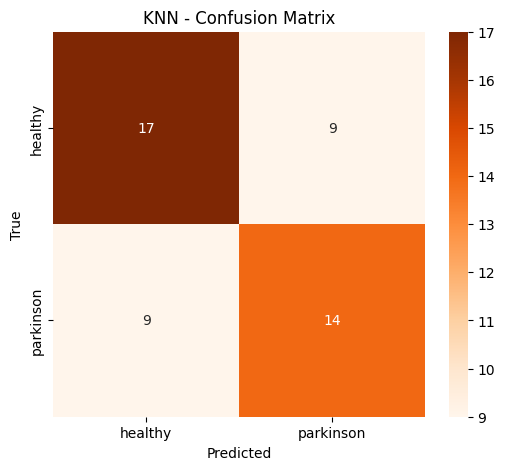


💾 Model saved successfully as 'audio_knn_model.pkl'


In [25]:
import numpy as np
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Train the KNN model
# -------------------------------
knn_model = KNeighborsClassifier(
    n_neighbors=5,      # You can try 3, 5, 7, etc.
    metric='minkowski', # Distance metric (Euclidean by default)
    p=2                 # p=2 means Euclidean distance
)
knn_model.fit(X_train, y_train)

# -------------------------------
# 2️⃣ Make predictions
# -------------------------------
y_pred = knn_model.predict(X_test)

# -------------------------------
# 3️⃣ Evaluate the model
# -------------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ KNN Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# -------------------------------
# 4️⃣ Save the trained model
# -------------------------------
with open("audio_knn_model.pkl", "wb") as f:
    pickle.dump({
        "model": knn_model,
        "labels": np.unique(y)
    }, f)

print("\n💾 Model saved successfully as 'audio_knn_model.pkl'")



✅ XGBoost Model Accuracy: 93.88%

Classification Report:
              precision    recall  f1-score   support

     healthy       1.00      0.88      0.94        26
   parkinson       0.88      1.00      0.94        23

    accuracy                           0.94        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.95      0.94      0.94        49



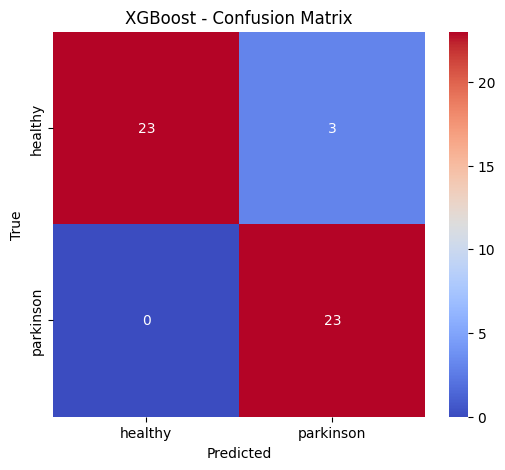


💾 Model and label encoder saved successfully as 'audio_xgb_model.pkl'


In [26]:
import numpy as np
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 🔹 Encode Labels to Integers
# -------------------------------
le = LabelEncoder()
y_encoded = le.fit_transform(y)   # Converts ["A", "E", "N", "S"] → [0, 1, 2, 3]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.20, random_state=42
)

# -------------------------------
# 1️⃣ Train the XGBoost model
# -------------------------------
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, y_train)

# -------------------------------
# 2️⃣ Make predictions
# -------------------------------
y_pred = xgb_model.predict(X_test)

# -------------------------------
# 3️⃣ Evaluate the model
# -------------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ XGBoost Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# -------------------------------
# 4️⃣ Save the trained model + encoder
# -------------------------------
with open("audio_xgb_model.pkl", "wb") as f:
    pickle.dump({
        "model": xgb_model,
        "label_encoder": le
    }, f)

print("\n💾 Model and label encoder saved successfully as 'audio_xgb_model.pkl'")



✅ Voting Classifier Accuracy: 93.88%

Classification Report:
              precision    recall  f1-score   support

     healthy       1.00      0.88      0.94        26
   parkinson       0.88      1.00      0.94        23

    accuracy                           0.94        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.95      0.94      0.94        49



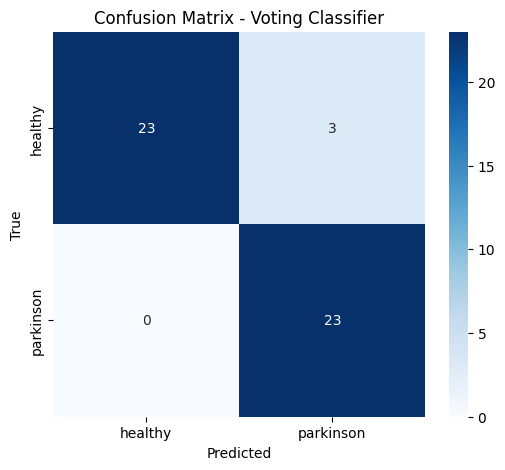


💾 Model saved successfully as 'voting_model.pkl'


In [27]:
import numpy as np
import librosa
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------- STEP 1: Encode Labels -----------------
le = LabelEncoder()
y_enc = le.fit_transform(y)

# ----------------- STEP 2: Split Data -----------------
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)

# ----------------- STEP 3: Define Models -----------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svc = SVC(probability=True, kernel='rbf', random_state=42)

# ----------------- STEP 4: Build Voting Classifier -----------------
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('dt', dt),
        ('svc', svc)
    ],
    voting='soft'
)

# ----------------- STEP 5: Train Model -----------------
voting_clf.fit(X_train, y_train)

# ----------------- STEP 6: Predictions -----------------
y_pred = voting_clf.predict(X_test)

# ----------------- STEP 7: Evaluate -----------------
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Voting Classifier Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ----------------- STEP 8: Save Model -----------------
with open("voting_model.pkl", "wb") as f:
    pickle.dump({"model": voting_clf, "label_encoder": le}, f)

print("\n💾 Model saved successfully as 'voting_model.pkl'")


C:\Users\HP\anaconda3\envs\leaf_disease\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



✅ Stacking Model Accuracy: 93.88%

Classification Report:
              precision    recall  f1-score   support

     healthy       1.00      0.88      0.94        26
   parkinson       0.88      1.00      0.94        23

    accuracy                           0.94        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.95      0.94      0.94        49



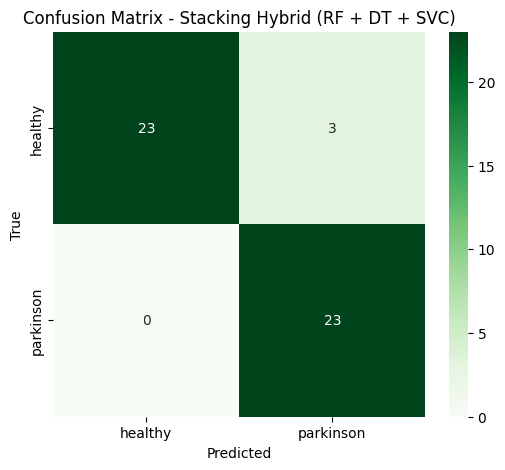


💾 Model saved successfully as 'stacking_model.pkl'


In [28]:
import numpy as np
import librosa
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------- STEP 1: Encode Labels -----------------
le = LabelEncoder()
y_enc = le.fit_transform(y)

# ----------------- STEP 2: Split Data -----------------
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)

# ----------------- STEP 3: Define Base Models -----------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svc = SVC(probability=True, kernel='rbf', random_state=42)

# ----------------- STEP 4: Define Stacking Classifier -----------------
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('dt', dt),
        ('svc', svc)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    stack_method='predict_proba',
    passthrough=True
)

# ----------------- STEP 5: Train the Stacking Model -----------------
stacking_clf.fit(X_train, y_train)

# ----------------- STEP 6: Predictions -----------------
y_pred = stacking_clf.predict(X_test)

# ----------------- STEP 7: Evaluation -----------------
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Stacking Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Stacking Hybrid (RF + DT + SVC)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ----------------- STEP 8: Save Model -----------------
with open("stacking_model.pkl", "wb") as f:
    pickle.dump({
        "model": stacking_clf,
        "label_encoder": le,
        "feature_columns": X.shape[1]
    }, f)

print("\n💾 Model saved successfully as 'stacking_model.pkl'")
